In [9]:
# initialization
#from qiskit import *
import numpy as np
from math import pi
# importing Qiskit
from qiskit import IBMQ, Aer,ClassicalRegister
from qiskit import QuantumCircuit, assemble, transpile

# import basic plot tools
from qiskit.visualization import plot_histogram

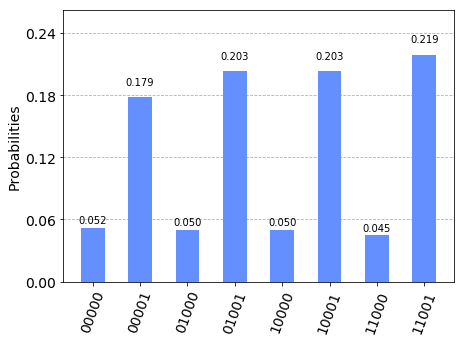

In [10]:
#correct (my work) (Perfect)
#q2 has higher value than q1 (for initilization also)

#unchanged
qc_init=QuantumCircuit(5,5)
qc_init.h(3)
qc_init.x(3)
qc_init.cu3(0.643,0,0,3,4)
qc_init.x(3)
qc_init.cu3(2.498,0,0,3,4)
qc_init.barrier()
#qc_init.draw('mpl')

#---------------------------------
#changed
qc_PE=QuantumCircuit(5,5)

qc_PE.h(1)
qc_PE.h(2)

qc_PE.cu1(-pi/2,1,3)     #this is same as qc_PE.crz(-pi/2,2,3)
qc_PE.cu3(pi/2,0,0,1,3)  #this is same as qc_PE.cry(pi/2,2,3)
qc_PE.cu1(pi/2,1,3)
qc_PE.u1(3*pi/4,1)

qc_PE.cx(2,3)

qc_PE.swap(1,2)
qc_PE.h(1)
qc_PE.cu1(-pi/2,1,2)
qc_PE.h(2)
qc_PE.barrier()
#qc_PE.draw('mpl')
#------------------------------------

#changed
qc_CU=QuantumCircuit(5,5)
qc_CU.x(2)
qc_CU.cx(2,1)
qc_CU.x(2)
qc_CU.barrier()
#qc_CU.draw('mpl')

#-------------------------------------

#original
qc_rot=QuantumCircuit(5,5)
qc_rot.x(1)
qc_rot.x(2)
qc_rot.ccx(1,2,0)
qc_rot.x(0)
qc_rot.x(1)
qc_rot.x(2)
qc_rot.barrier()
#qc_rot.draw('mpl')

#-----------------------------------------

qc=qc_init+qc_PE+qc_CU+qc_rot+qc_CU.inverse()+qc_PE.inverse()
for i in range(5):
    qc.measure(i,i)

qc.draw('mpl')

#------------------------------------------

qasm_sim = Aer.get_backend('qasm_simulator')
shots = 1024
qobj = assemble(qc, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)